In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

# change path if necessary
import sys
my_path = r'D:\Documents\etudes\epfl\MA1\cours\MachineLearning\Project1' # to be adapated
sys.path.insert(0,my_path + r'\code\COMMON')

# imports
import numpy as np 
import matplotlib.pyplot as plt

from implementations import *
from labels import idx_2labels
from costs import *
from optimize_hyperparams import *
from cross_validation import *
from step_wise import *

# Build dataset

In [2]:
from proj1_helpers import load_csv_data 

# load raw data
y_raw, input_data_raw, ids = load_csv_data(my_path + r'\data\train.csv', sub_sample=False)

In [3]:
from outliers import handle_outliers

# handle outliers
X_raw, y = handle_outliers(input_data_raw, y_raw, -999, 'mean')

# set y in {0,1} instead of {-1,1}
y[np.where(y==-1)]=0

-999 are replaced by the mean value of the feature


In [4]:
# get feature names 
all_features_raw = list(np.genfromtxt(my_path + r'/data/train.csv', delimiter=",", dtype=str, max_rows = 1)[2:])

In [6]:
from extend_features import extend_features

# feature degree
degree = 1

# extend feature set
all_candidates, features = extend_features(X_raw, all_features_raw, degree, is_add_log = True, is_standardize = False)
print(all_candidates.shape)

---------------------------
Features have been set to the power(s): [1]
16 Features of the momentum have been added
4 logarithmic features have been added.
Data have NOT been standardized.
---------------------------
(250000, 50)


In [7]:
# best features
idx_features = [1, 13, 4, 46, 0, 11, 44, 43, 7, 2, 16, 48, 10, 6, 49, 22, 45, 12, 19, 23, 32, 24, 17, 14, 39, 42, 30, 31, 47, 38, 20]

# save the selected features
Xsw = all_candidates[:, idx_features]
print(Xsw.shape)
print(y.shape)

(250000, 31)
(250000,)


# Optimization of degree when lambda = 0

tested degree:  [ 1  2  3  4  5  6  7  8  9 10] 

------------------------------------------ cross validation with degree =  1
0
--------------------- final iteration


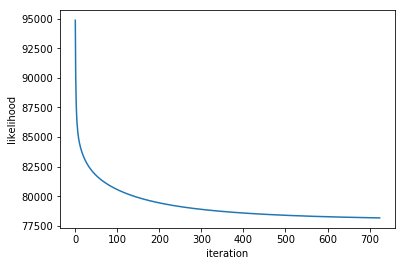

1
--------------------- final iteration


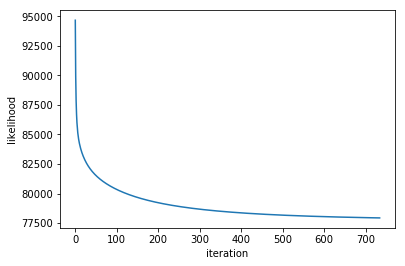

2
--------------------- final iteration


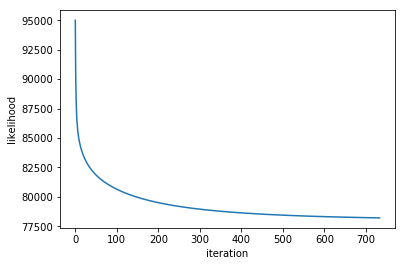

------------------------------------------ cross validation with degree =  2
0
--------------------- final iteration


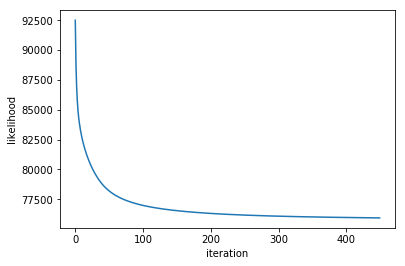

1
--------------------- final iteration


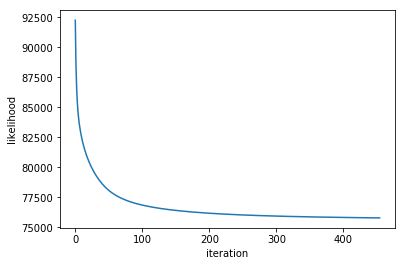

2
--------------------- final iteration


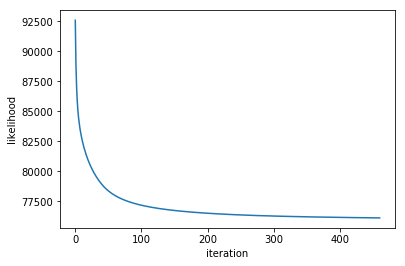

------------------------------------------ cross validation with degree =  3
0
n_iter: 1000 , ||grad|| = 270.234369801


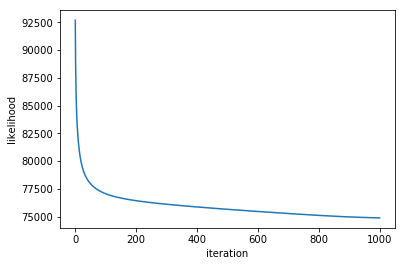

--------------------- final iteration


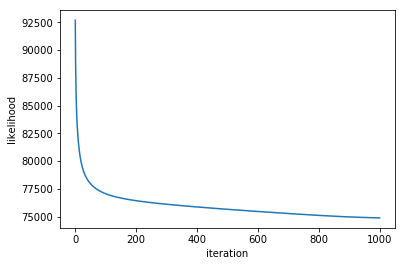

1
n_iter: 1000 , ||grad|| = 251.065640303


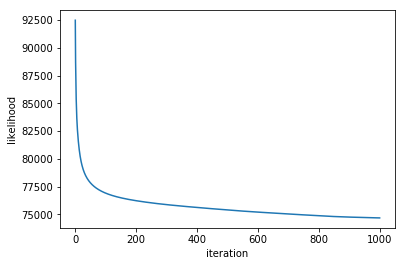

--------------------- final iteration


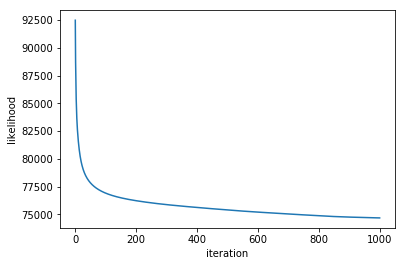

2
n_iter: 1000 , ||grad|| = 266.794357489


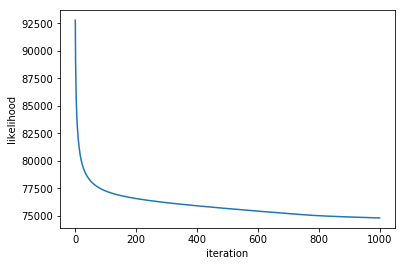

--------------------- final iteration


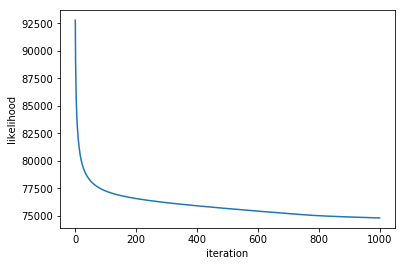

------------------------------------------ cross validation with degree =  4
0
--------------------- final iteration


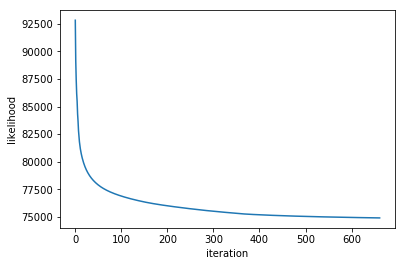

1
--------------------- final iteration


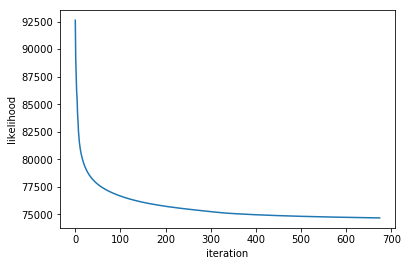

2
--------------------- final iteration


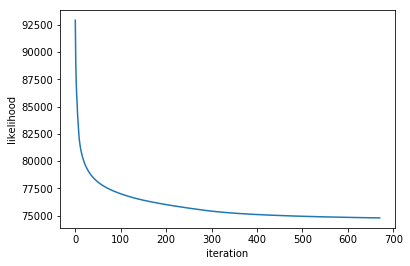

------------------------------------------ cross validation with degree =  5
0
--------------------- final iteration


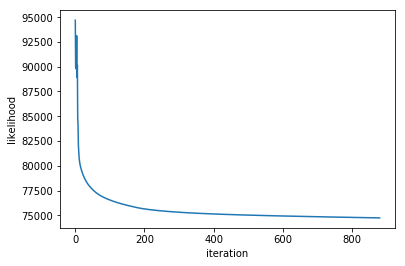

1
n_iter: 1000 , ||grad|| = 260.463472535


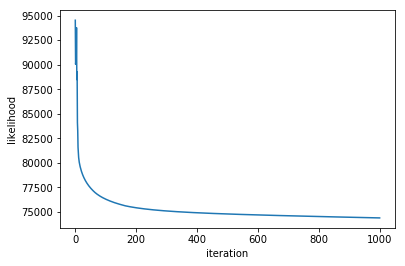

--------------------- final iteration


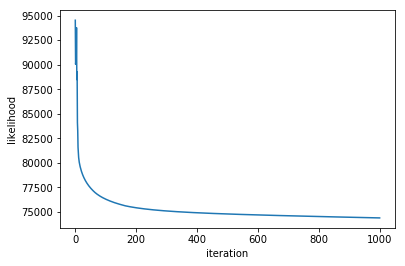

2
--------------------- final iteration


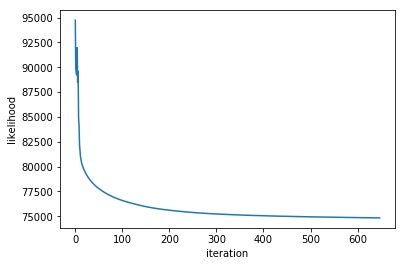

------------------------------------------ cross validation with degree =  6
0
n_iter: 1000 , ||grad|| = 287.2504612


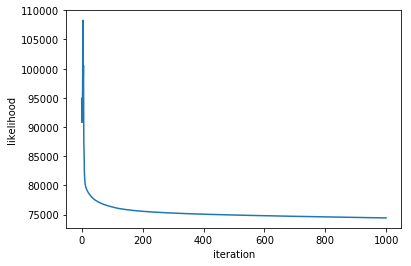

--------------------- final iteration


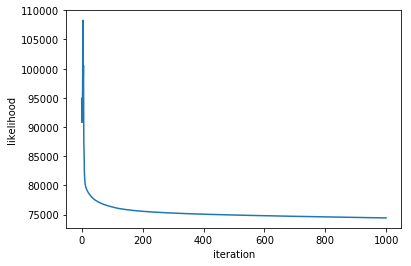

1
n_iter: 1000 , ||grad|| = 310.021891269


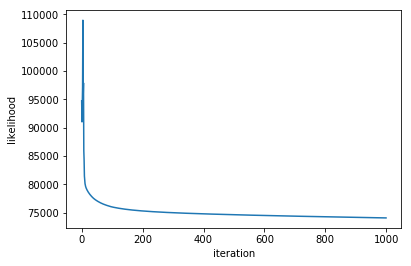

--------------------- final iteration


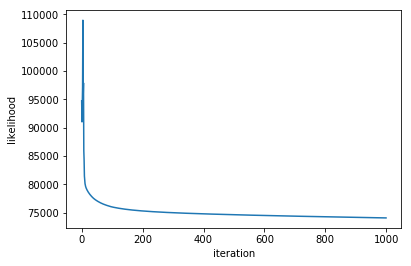

2
n_iter: 1000 , ||grad|| = 261.100066347


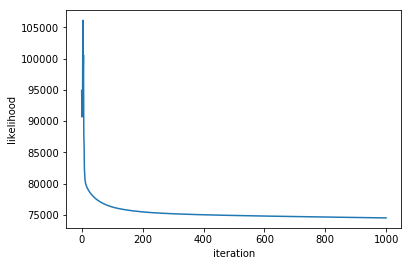

--------------------- final iteration


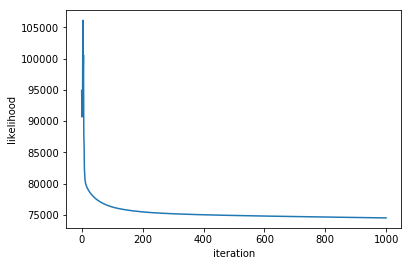

------------------------------------------ cross validation with degree =  7
0
n_iter: 1000 , ||grad|| = 284.224644997


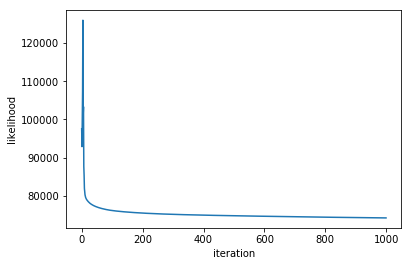

--------------------- final iteration


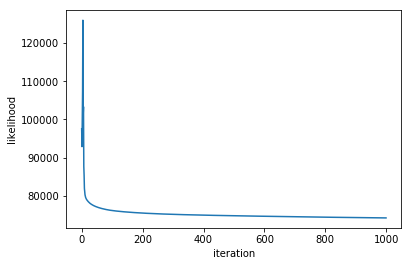

1
n_iter: 1000 , ||grad|| = 254.896562405


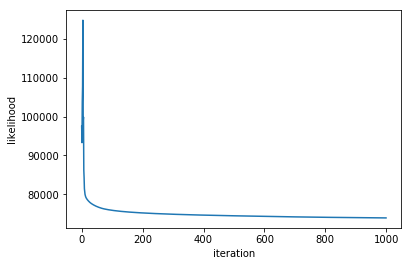

--------------------- final iteration


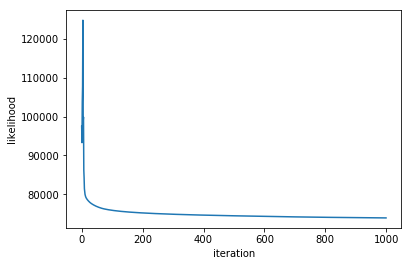

2
n_iter: 1000 , ||grad|| = 291.657356006


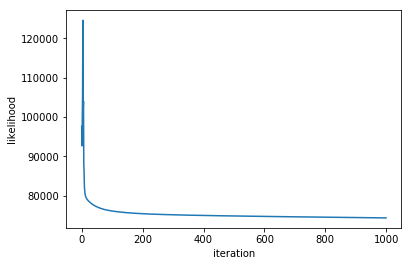

--------------------- final iteration


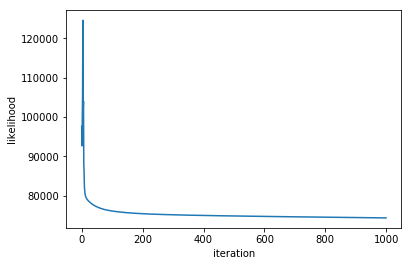

------------------------------------------ cross validation with degree =  8
0
--------------------- final iteration


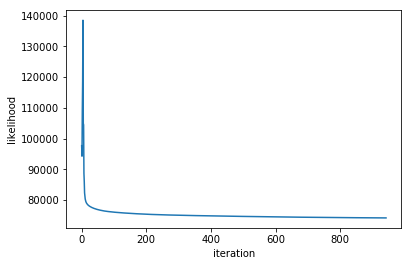

1
--------------------- final iteration


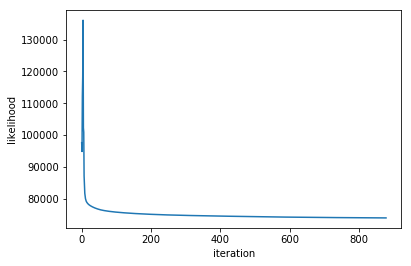

2
n_iter: 1000 , ||grad|| = 258.990644876


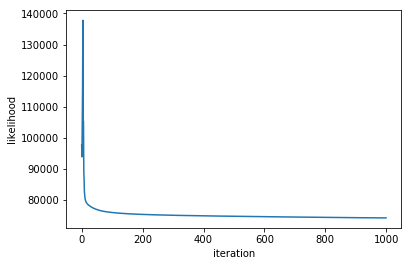

--------------------- final iteration


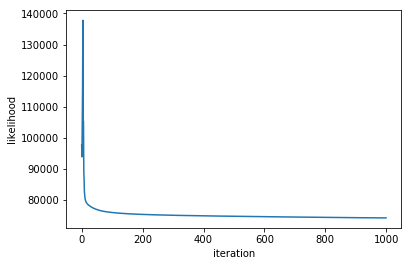

------------------------------------------ cross validation with degree =  9
0
--------------------- final iteration


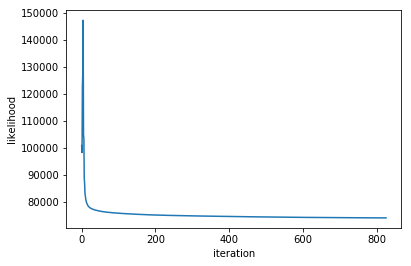

1
--------------------- final iteration


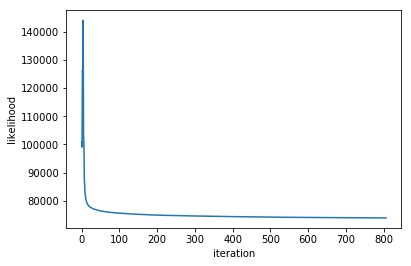

2
--------------------- final iteration


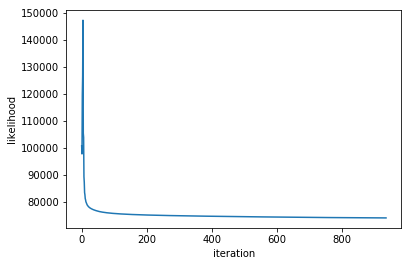

------------------------------------------ cross validation with degree =  10
0
n_iter: 1000 , ||grad|| = 300.294815079


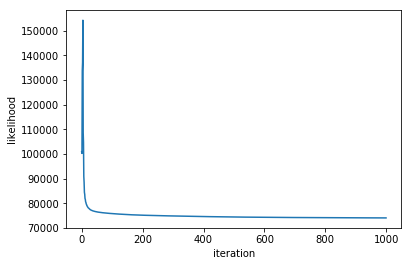

--------------------- final iteration


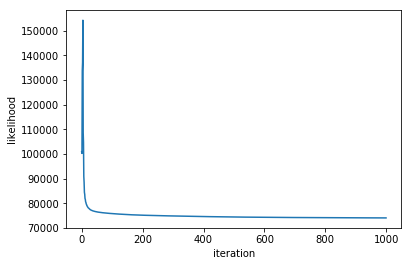

1
n_iter: 1000 , ||grad|| = 1088.33540921


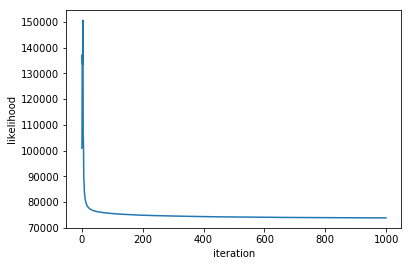

--------------------- final iteration


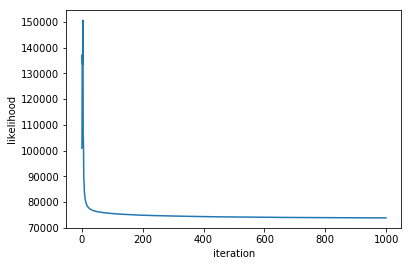

2
--------------------- final iteration


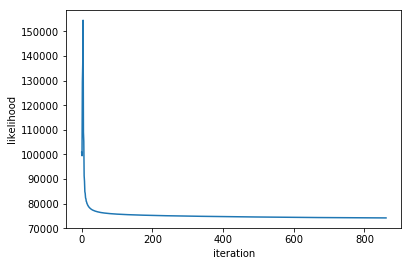

Optimal degree:  8
Associated testing loss:  37166.422307 



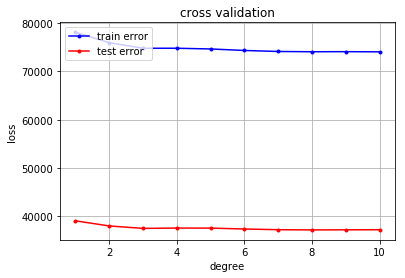

In [20]:
# feature selection
Xsw2 = all_candidates[:, idx_features[:10]]

# model parameters
model = dict()
model['method'] = 'lr' 
model['loss'] = 'loglikelihood'

# model hyperparameter
model['gamma'] = 1e-5
model['method_minimization'] = 'gd' 
model['threshold'] = 250
model['max_iters'] = 1000
model['debug_mode'] = 1

# optimization parameters
degree_min = 1 
degree_max = 10
degree_steps = 1
model['k_fold'] = 3

# optimize degree
w_opt, loss_tr, loss_te, degree_opt, success_rate = optimize_degree(y, Xsw2, degree_min, degree_max, degree_steps, model, debug_mode=1)

# Optimization of lambda through simple cross validation

In [49]:
# model parameters
model = dict()
model['method'] = 'lrr' 
model['loss'] = 'loglikelihood'

# model hyperparameter
model['gamma'] = 1e-5
model['method_minimization'] = 'gd' 
model['threshold'] = 1000
model['max_iters'] = 1000
model['debug_mode'] = 1

# optimization parameters
lambda_min = -1 
lambda_max = 3
lambda_steps = 5
model['k_fold'] = 3

# feature selection
Xsw3 = all_candidates[:, idx_features[:10]]

# build polynomial basis function
phi3 = build_poly(Xsw3, degree_opt)
        
# standardization
phi3_tmp,_,_ =  standardize(phi3[:,1:]) 
phi3[:,1:] = phi3_tmp

# intial w
model['initial_w'] = np.zeros(phi3.shape[1])

print(phi3.shape)
print(model)

(250000, 81)
{'method': 'lrr', 'loss': 'loglikelihood', 'gamma': 1e-05, 'method_minimization': 'gd', 'threshold': 1000, 'max_iters': 1000, 'debug_mode': 1, 'k_fold': 3, 'initial_w': array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.])}


tested lambda_:  [  1.00000000e-01   1.00000000e+00   1.00000000e+01   1.00000000e+02
   1.00000000e+03] 

------------------------------------------ cross validation with lambda_ =  0.1
0
ok
--------------------- final iteration


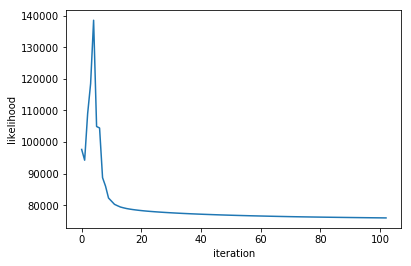

1
ok
--------------------- final iteration


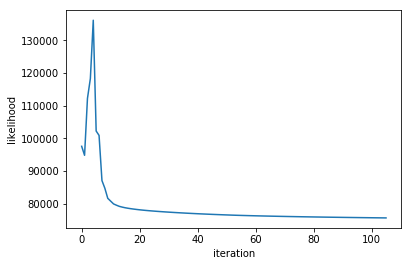

2
ok
--------------------- final iteration


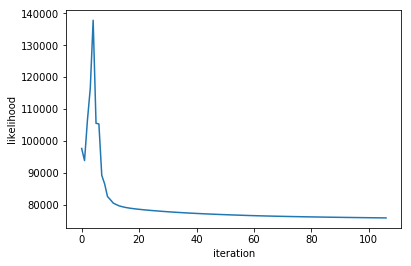

------------------------------------------ cross validation with lambda_ =  1.0
0
ok
--------------------- final iteration


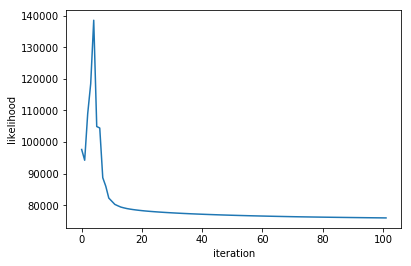

1
ok
--------------------- final iteration


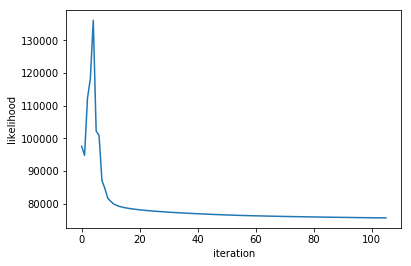

2
ok
--------------------- final iteration


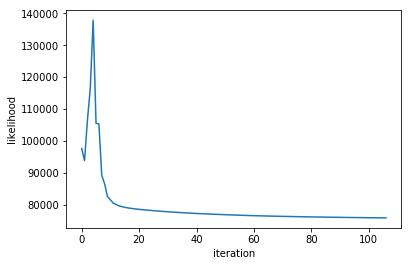

------------------------------------------ cross validation with lambda_ =  10.0
0
ok
--------------------- final iteration


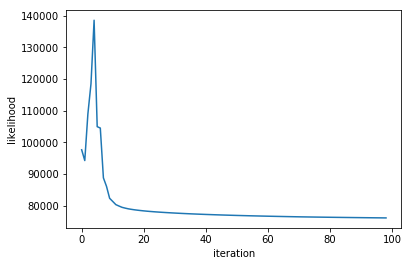

1
ok
--------------------- final iteration


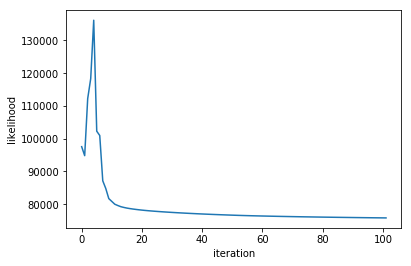

2
ok
--------------------- final iteration


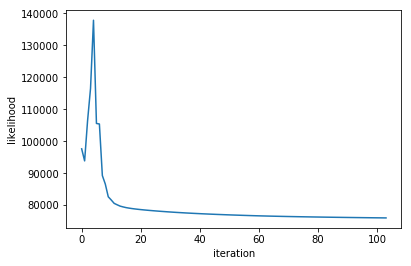

------------------------------------------ cross validation with lambda_ =  100.0
0
ok
--------------------- final iteration


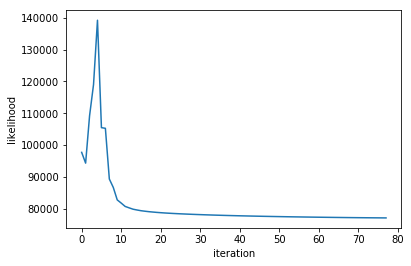

1
ok
--------------------- final iteration


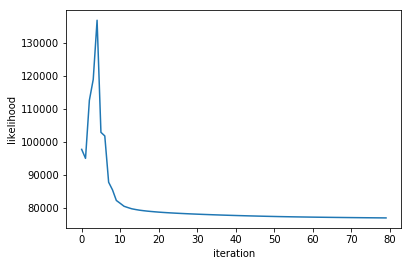

2
ok
--------------------- final iteration


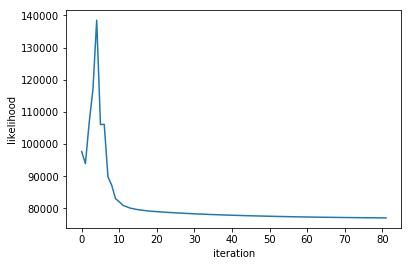

------------------------------------------ cross validation with lambda_ =  1000.0
0
ok
--------------------- final iteration


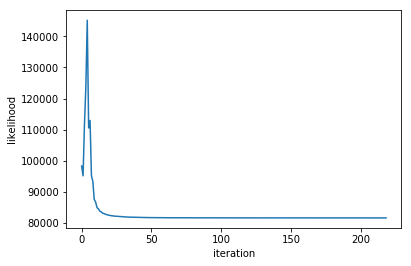

1
ok
n_iter: 1000 , ||grad|| = 2242.63865446


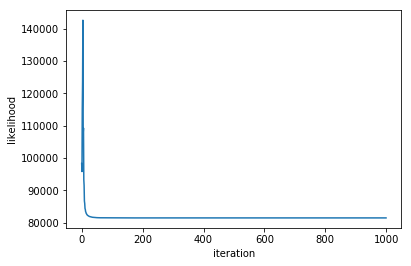

--------------------- final iteration


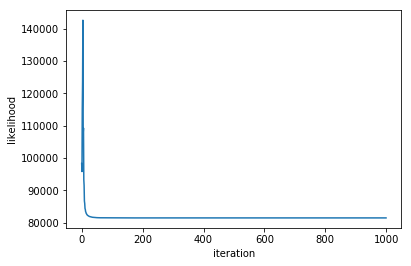

2
ok
--------------------- final iteration


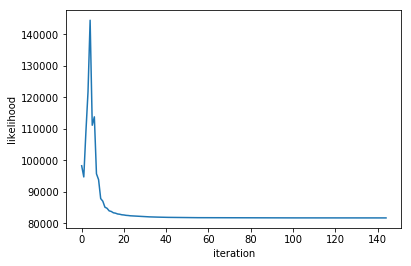

Optimal lambda:  0.1
Associated testing loss:  38065.652185 



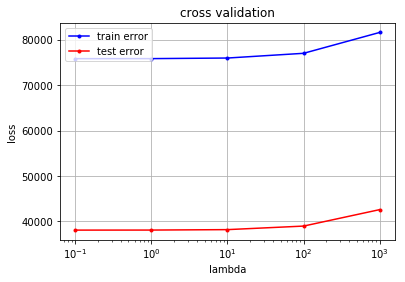

In [50]:
# optimize lambda_
w_opt, loss_tr, loss_te, lambda_opt, success_rate = optimize_lambda(y, phi3, lambda_min, lambda_max, lambda_steps, model, debug_mode=1)